In [1]:
import numpy as np
import pandas as pd
import sys, os, time
main_folder = './../'
if main_folder not in sys.path:
    sys.path.append(main_folder)
from evolution import DifferentialEvolution
from glob       import glob
from tqdm       import tqdm

import dirs
from utils      import get_solution, ProgressBar, write_log
import matplotlib.pyplot as plt 

progbar = ProgressBar(elapsed_time=True)

### Parameters

In [2]:
# Competition Parameters
funcId      = 1
dim         = 10
numRuns     = 2
targetError = 1e-8

# Algorithm Parameters
pop_size = 300
percMaxEvals = 1
maxEvals = 'auto'
maxGenerations = None
fitness_clusters = None
crossover = 'binonial'
mutation = 'best'
n_diff = 1
lambda_mutation = .5
opposition = False
input_data_filepath = './../input_data'
active = False

In [3]:
# Parameters
algorithm = "de"
mutation = "best"
n_diff = 1
crossover = "bin"
funcId = 2
dim = 10
numRuns = 51
pop_size = 300
percMaxEvals = 0.5
lambda_mutation = 0.5
opposition = False
fitness_clusters = None
input_data_filepath = "./input_data"
active = True


In [4]:
maxEvals = maxEvals if percMaxEvals is None else percMaxEvals*10000*dim
run_tag = '[' + '_'.join([str(funcId), 
                          str(dim), 
                          str(numRuns),
                          str(pop_size), 
                          str(percMaxEvals),                                                     
                          '{}'.format(lambda_mutation), 
                          str(opposition),
                          str(fitness_clusters)
                         ])  + ']'
run_tag

'[2_10_51_300_0.5_0.5_False_None]'

In [5]:
alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)

output_filepath = os.path.join(dirs.results, str(alg))
if not os.path.exists(output_filepath):
    os.makedirs(output_filepath)
output_filepath = output_filepath + '/' + run_tag

print ('Writing log at ', output_filepath + 'log.tsv')
write_log(filepath=output_filepath + 'log.tsv', 
          mode="w+", 
          text='[{}]\trun\telapsedTime\tsuccessRate\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime())))  

Writing log at 

./results/DE/best/1/bin/[2_10_51_300_0.5_0.5_False_None]log.tsv

In [6]:
hist = pd.DataFrame()
arr_runs = range(numRuns)
solution = get_solution(funcId, dim, input_data_filepath=input_data_filepath)
successRate = 0
for idx_run in arr_runs:
    progbar.update_progress(idx_run/float(len(arr_runs)))
    
    # Differential Evolution
    alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)
    
    errorHist, fitnessHist = alg.optimize(target=solution, max_f_evals=maxEvals, target_error=targetError, verbose=True)        
    bestError = errorHist.iloc[-1,:].min()
    errorHist["run"] = np.ones(errorHist.shape[0], dtype=int)*idx_run
    hist = pd.concat([hist, errorHist], ignore_index=False)    
    if bestError <= targetError:
        print ("Target error achieved with error {}".format(bestError))
        successRate += 1
    
    write_log(filepath=output_filepath + 'log.tsv', 
              text='[{}]\t{}/{}\t{}\t{}\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime()), 
                                              idx_run+1,
                                              len(arr_runs),
                                              progbar.get_elapsed_time(),
                                              successRate)
             )
    
hist.index.name = 'generation'
hist.to_csv(output_filepath + 'hist.tsv', sep='\t')
progbar.update_progress(1)

[0:00:00][----------] 0.00% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	17311.2627

Best Fitness:	3677.3838
Solution:	200.0000
Diff:		3477.3838

[0:06:32][----------] 1.96% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	23373.1609

Best Fitness:	6533.7163
Solution:	200.0000
Diff:		6333.7163

[0:12:35][----------] 3.92% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	10225.2219

Best Fitness:	2680.1987
Solution:	200.0000
Diff:		2480.1987

[0:18:23][#---------] 5.88% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	6714.9099

Best Fitness:	1790.9824
Solution:	200.0000
Diff:		1590.9824

[0:24:13][#---------] 7.84% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	17535.5185

Best Fitness:	10708.4613
Solution:	200.0000
Diff:		10508.4613

[0:29:38][#---------] 9.80% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	9301.8064

Best Fitness:	1834.7329
Solution:	200.0000
Diff:		1634.7329

[0:35:15][#---------] 11.76% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	7155.1124

Best Fitness:	1525.8840
Solution:	200.0000
Diff:		1325.8840

[0:40:33][#---------] 13.73% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	8274.7326

Best Fitness:	2070.1736
Solution:	200.0000
Diff:		1870.1736

[0:45:40][##--------] 15.69% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	12047.2929

Best Fitness:	3684.3170
Solution:	200.0000
Diff:		3484.3170

[0:50:39][##--------] 17.65% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	10690.3118

Best Fitness:	2591.9669
Solution:	200.0000
Diff:		2391.9669

[0:55:36][##--------] 19.61% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	7746.9767

Best Fitness:	1522.9002
Solution:	200.0000
Diff:		1322.9002

[1:00:55][##--------] 21.57% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	11376.6546

Best Fitness:	3243.1905
Solution:	200.0000
Diff:		3043.1905

[1:06:08][##--------] 23.53% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	11802.4055

Best Fitness:	4133.8734
Solution:	200.0000
Diff:		3933.8734

[1:11:29][###-------] 25.49% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	12212.7833

Best Fitness:	2472.2763
Solution:	200.0000
Diff:		2272.2763

[1:16:45][###-------] 27.45% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	12214.8589

Best Fitness:	3097.2278
Solution:	200.0000
Diff:		2897.2278

[1:22:02][###-------] 29.41% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	10755.3989

Best Fitness:	1470.5874
Solution:	200.0000
Diff:		1270.5874

[1:27:06][###-------] 31.37% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	5384.4764

Best Fitness:	1212.1653
Solution:	200.0000
Diff:		1012.1653

[1:32:07][###-------] 33.33% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	12047.5040

Best Fitness:	3705.6937
Solution:	200.0000
Diff:		3505.6937

[1:37:09][####------] 35.29% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	12480.7004

Best Fitness:	3342.9609
Solution:	200.0000
Diff:		3142.9609

[1:42:04][####------] 37.25% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	8204.9301

Best Fitness:	2601.9125
Solution:	200.0000
Diff:		2401.9125

[1:47:00][####------] 39.22% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	10360.1881

Best Fitness:	2926.1858
Solution:	200.0000
Diff:		2726.1858

[1:51:50][####------] 41.18% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	12473.7629

Best Fitness:	3407.4906
Solution:	200.0000
Diff:		3207.4906

[1:56:43][####------] 43.14% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	5631.2952

Best Fitness:	1338.2200
Solution:	200.0000
Diff:		1138.2200

[2:01:31][#####-----] 45.10% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	8829.7741

Best Fitness:	1953.7912
Solution:	200.0000
Diff:		1753.7912

[2:06:23][#####-----] 47.06% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	15640.0916

Best Fitness:	4796.2964
Solution:	200.0000
Diff:		4596.2964

[2:11:09][#####-----] 49.02% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	6937.7658

Best Fitness:	1419.2125
Solution:	200.0000
Diff:		1219.2125

[2:15:54][#####-----] 50.98% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	8305.2211

Best Fitness:	1195.2545
Solution:	200.0000
Diff:		995.2545

[2:21:08][#####-----] 52.94% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	8216.0689

Best Fitness:	2685.8403
Solution:	200.0000
Diff:		2485.8403

[2:25:55][#####-----] 54.90% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	9678.8566

Best Fitness:	2893.5395
Solution:	200.0000
Diff:		2693.5395

[2:30:31][######----] 56.86% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	3478.6106

Best Fitness:	1262.8691
Solution:	200.0000
Diff:		1062.8691

[2:34:56][######----] 58.82% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	3205.4376

Best Fitness:	1004.0743
Solution:	200.0000
Diff:		804.0743

[2:39:15][######----] 60.78% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	27106.1290

Best Fitness:	7019.1647
Solution:	200.0000
Diff:		6819.1647

[2:43:41][######----] 62.75% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	6424.4008

Best Fitness:	1543.6753
Solution:	200.0000
Diff:		1343.6753

[2:47:50][######----] 64.71% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	9132.5724

Best Fitness:	2109.0350
Solution:	200.0000
Diff:		1909.0350

[2:52:14][#######---] 66.67% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	12999.3937

Best Fitness:	3479.4975
Solution:	200.0000
Diff:		3279.4975

[2:56:36][#######---] 68.63% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	9343.6402

Best Fitness:	2393.8860
Solution:	200.0000
Diff:		2193.8860

[3:00:42][#######---] 70.59% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	6852.0307

Best Fitness:	2427.9919
Solution:	200.0000
Diff:		2227.9919

[3:05:03][#######---] 72.55% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	6378.9881

Best Fitness:	1836.0341
Solution:	200.0000
Diff:		1636.0341

[3:09:11][#######---] 74.51% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	1975.4685

Best Fitness:	468.3002
Solution:	200.0000
Diff:		268.3002

[3:13:25][########--] 76.47% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	12568.5624

Best Fitness:	3576.7914
Solution:	200.0000
Diff:		3376.7914

[3:17:45][########--] 78.43% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	7971.5020

Best Fitness:	1478.4805
Solution:	200.0000
Diff:		1278.4805

[3:21:46][########--] 80.39% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	7333.5360

Best Fitness:	1028.5537
Solution:	200.0000
Diff:		828.5537

[3:25:42][########--] 82.35% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	8275.8897

Best Fitness:	2388.9862
Solution:	200.0000
Diff:		2188.9862

[3:29:48][########--] 84.31% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	13790.9700

Best Fitness:	3559.4759
Solution:	200.0000
Diff:		3359.4759

[3:33:38][#########-] 86.27% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	9891.3186

Best Fitness:	3525.5700
Solution:	200.0000
Diff:		3325.5700

[3:37:48][#########-] 88.24% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	9979.7636

Best Fitness:	2864.5469
Solution:	200.0000
Diff:		2664.5469

[3:42:00][#########-] 90.20% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	7096.5854

Best Fitness:	2231.0290
Solution:	200.0000
Diff:		2031.0290

[3:46:02][#########-] 92.16% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	7405.6129

Best Fitness:	1808.1697
Solution:	200.0000
Diff:		1608.1697

[3:50:00][#########-] 94.12% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	5509.1785

Best Fitness:	869.9921
Solution:	200.0000
Diff:		669.9921

[3:54:00][##########] 96.08% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	9606.5411

Best Fitness:	2287.3582
Solution:	200.0000
Diff:		2087.3582

[3:58:10][##########] 98.04% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	7064.7580

Best Fitness:	1742.4426
Solution:	200.0000
Diff:		1542.4426

[4:02:15][##########] 100.00% Done...


In [7]:
print ("Elapsed Time: ", progbar.get_elapsed_time())

Elapsed Time: 

4:02:15

In [8]:
errorHist.tail()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,run
generation,,,,,,,,,,,,,,,,,,,,,
160,6070.839992,11539.845939,8224.454645,9555.916533,5759.277234,11507.71692,11951.566808,10305.873875,8192.670927,9915.904848,...,6506.886884,6343.848477,11025.435873,12812.920787,11099.933182,8194.689239,3555.316126,15758.610329,10362.772632,50
161,6070.839992,7101.492620,8224.454645,9555.916533,5759.277234,11507.71692,11951.566808,10305.873875,8192.670927,9915.904848,...,6506.886884,6343.848477,11025.435873,12812.920787,11099.933182,8194.689239,3555.316126,15758.610329,9916.612915,50
162,6070.839992,6134.170760,8224.454645,9555.916533,5759.277234,11507.71692,9820.934564,10305.873875,8192.670927,9915.904848,...,4562.278031,6343.848477,11025.435873,12812.920787,10382.583417,8194.689239,3555.316126,15758.610329,9916.612915,50
163,6070.839992,6134.170760,8224.454645,6277.612835,5759.277234,11507.71692,9820.934564,10305.873875,8192.670927,7660.537505,...,4562.278031,6343.848477,11025.435873,12812.920787,10382.583417,8194.689239,3555.316126,15758.610329,8524.944470,50
164,6070.839992,6134.170760,3648.876093,6277.612835,5759.277234,11507.71692,6966.188987,8981.281454,8192.670927,7660.537505,...,4389.415309,6343.848477,4034.634957,12812.920787,9001.890542,8194.689239,3555.316126,8027.332932,8524.944470,50


In [9]:
arr_error = list()
arr_best_error = list()
for run in hist['run'].unique():
    df_run = hist[hist['run'] == run].drop(['run'], axis=1) 
    bestError = df_run.iloc[-1,:].min()    
    arr_best_error.append(bestError)    
    print ('Best error for run {}: {}'.format(run, bestError))
    arr_error.append(np.array(df_run.min(axis=1)))    
arr_error = np.array(arr_error)
# arr_error

Best error for run 0: 3477.3837692013985

Best error for run 1: 6333.716336543655

Best error for run 2: 2480.1987238613683

Best error for run 3: 1590.9823895096508

Best error for run 4: 10508.461283852053

Best error for run 5: 1634.7329214564922

Best error for run 6: 1325.8839554970739

Best error for run 7: 1870.1736390863343

Best error for run 8: 3484.31697797759

Best error for run 9: 2391.966918424213

Best error for run 10: 1322.900185236821

Best error for run 11: 3043.19050441822

Best error for run 12: 3933.873369217963

Best error for run 13: 2272.276272208497

Best error for run 14: 2897.22780481275

Best error for run 15: 1270.5874451697305

Best error for run 16: 1012.1652637053985

Best error for run 17: 3505.693654345304

Best error for run 18: 3142.960948046946

Best error for run 19: 2401.912534171151

Best error for run 20: 2726.185804420152

Best error for run 21: 3207.4906217223397

Best error for run 22: 1138.2199846537915

Best error for run 23: 1753.7912279360435

Best error for run 24: 4596.296392876616

Best error for run 25: 1219.2125476458475

Best error for run 26: 995.2545461163704

Best error for run 27: 2485.84025845251

Best error for run 28: 2693.539539766429

Best error for run 29: 1062.8691425055576

Best error for run 30: 804.0743008929994

Best error for run 31: 6819.164685603869

Best error for run 32: 1343.6752909338622

Best error for run 33: 1909.0350088818632

Best error for run 34: 3279.4974611598695

Best error for run 35: 2193.8859559366756

Best error for run 36: 2227.9919246236323

Best error for run 37: 1636.0341336601825

Best error for run 38: 268.3001594971733

Best error for run 39: 3376.7913784501206

Best error for run 40: 1278.4805442249594

Best error for run 41: 828.5536846373593

Best error for run 42: 2188.9861898765866

Best error for run 43: 3359.4758916785804

Best error for run 44: 3325.5699947635476

Best error for run 45: 2664.5468759915407

Best error for run 46: 2031.0289908086124

Best error for run 47: 1608.169659617512

Best error for run 48: 669.9921210252029

Best error for run 49: 2087.358195811666

Best error for run 50: 1542.4426247835775

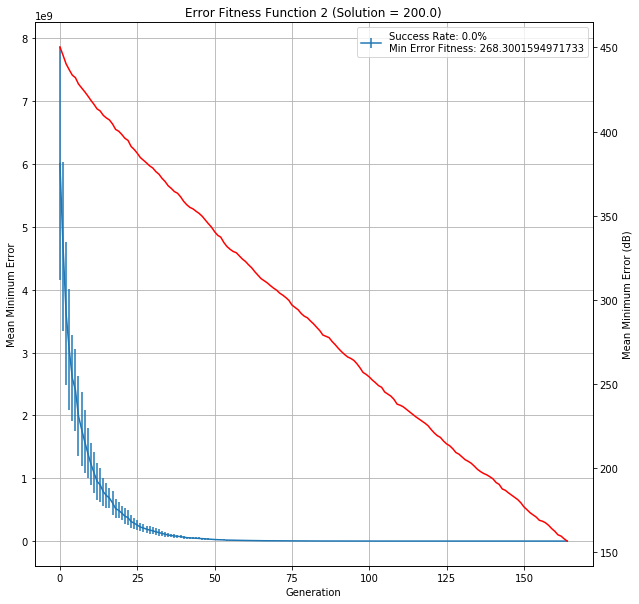

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
label = 'Success Rate: {}%\nMin Error Fitness: {}'.format(100*(successRate/float(numRuns)), arr_error.min())
ax.errorbar(np.arange(alg.generations), arr_error.mean(axis=0), yerr=arr_error.std(axis=0), label=label)
ax2 = ax.twinx()
ax2.plot(np.arange(alg.generations), 20*np.log(arr_error.mean(axis=0)), label='Mean Min Error (dB)', color='red')
ax2.set_ylabel('Mean Minimum Error (dB)')

ax.grid(True)
ax.set_ylabel('Mean Minimum Error')
ax.legend()
ax.set_xlabel('Generation')
ax.set_title('Error Fitness Function {} (Solution = {})'.format(funcId, solution))
plt.savefig(output_filepath + 'mean_error_evolution.jpeg', bbox_inches = 'tight')

In [11]:
df_sumup = pd.DataFrame(columns=['algorithm', '#Fc', 'D', 'percFES'] + ['run_' + str(i) for i in np.arange(1,numRuns+1,1)] + ['mean', 'elapsed_time', 'evals'])
df_sumup.loc[df_sumup.shape[0]] = [str(alg), funcId, dim, percMaxEvals] + arr_best_error + [np.mean(arr_best_error), progbar.get_elapsed_time(), alg.fitnessEvals]
print ('Saving df_sumup to ', output_filepath + 'df_sumup.tsv')
df_sumup.to_csv(output_filepath + 'df_sumup.tsv', sep='\t')
df_sumup

Saving df_sumup to 

./results/DE/best/1/bin/[2_10_51_300_0.5_0.5_False_None]df_sumup.tsv

,algorithm,#Fc,D,percFES,run_1,run_2,run_3,run_4,run_5,run_6,...,run_45,run_46,run_47,run_48,run_49,run_50,run_51,mean,elapsed_time,evals
0,DE/best/1/bin,2,10,0.5,3477.383769,6333.716337,2480.198724,1590.98239,10508.461284,1634.732921,...,3325.569995,2664.546876,2031.028991,1608.16966,669.992121,2087.358196,1542.442625,2494.556079,4:02:15,50100
